# Neural Networks

Learning Objectives:
* Students will learn about the function and limitations of an artificial neuron.
* Students will experiment to gain understanding of how an artificial neural network can overcome the limitations of a single artificial neuron.
* Students will apply sklearn's neural network modules to classification and regression problems.

Readings before class:
* Michael Nielsen. [Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/index.html):
  * [Chapter 1 up to but not including section "A simple network to classify handwritten digits"](http://neuralnetworksanddeeplearning.com/chap1.html) _Note: NAND stands for operation "not and", a Boolean function of two inputs x1, x2 that is true if and only if it is not the case that x1 and x2 are both true._
* [Tensorflow Playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.09400&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) _This is an excellent interactive demonstration of neural network learning.  See below for ways you can experiment to gain experiential insight to neural network learning._

Before class:
* After completing the Nielsen reading, read the summary below and especially note the relationship with logistic regression/classification.

In class:
* We will work together on the exercises in section "In Class".

Homework after class:
* Complete the section labeled "Homework" below before the next class when it will be collected.


# Natural and Artificial Neurons

A [Neuron](https://en.wikipedia.org/wiki/Neuron), depicted in the figure below, allow electrochemical signals that are input through dendrites to excite the neuron so as to send an electrochemical pulse as output along its single axon which, through synapses, signals other dendrites of other neurons, allowing for a network of electrochemical computations.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/10/Blausen_0657_MultipolarNeuron.png/500px-Blausen_0657_MultipolarNeuron.png" alt="Anatomy of a Multipolar Neuron from Wikipedia article" width="800"/>

Source: [https://en.wikipedia.org/wiki/Neuron](https://en.wikipedia.org/wiki/Neuron)

Relative to the complexity of a natural neuron cell, the [artificial neuron](https://en.wikipedia.org/wiki/Artificial_neuron) is a relatively simple mathematical model.

<img src="https://upload.wikimedia.org/wikipedia/commons/6/60/ArtificialNeuronModel_english.png" alt="Artificial Neuron" width="800"/>

Source: [https://upload.wikimedia.org/wikipedia/commons/6/60/ArtificialNeuronModel_english.png](https://upload.wikimedia.org/wikipedia/commons/6/60/ArtificialNeuronModel_english.png)

Inputs are multiplied by learned weights (positive or negative) and are summed.  This net input then passes through a nonlinear activation function that computes an output.  Outputs are typically from -1 to 1 or from 0 to 1.

Often there is a "bias" input, depicted as a constant input of 1 with its own weight, or as a threshold value for the nonlinear activation function (which is effectively the negative weight for such a bias input).  Different learned weights compute different nonlinear functions.  Consider an artificial neuron with a logistic (a.k.a. sigmoid) activation function $\sigma(z) \equiv \frac{1}{1+e^{-z}}$.  With inputs $x_j$, weights $w_j$, and bias $b$, the output of this sigmoid unit is $\frac{1}{1+\exp(-\sum_j w_j x_j-b)}$.  

This form is the same as used in [logistic regression](https://en.wikipedia.org/wiki/Logistic_regression)!  Learning the weights and bias of a single artificial sigmoid neuron is equivalent to learning the coefficients and intercept, respectively, of a logistic function in _logistic regression_.  Neural network learning for a single sigmoid neuron is the same as performing logistic regression.

This gives us a basis for understanding what a neuron can and cannot do.  A one-dimensional logistic regression fits a sigmoid to data.  A value of $\geq .5$ predicts 1, and a value $< .5$ predicts 0.  In one dimension, logistic regression finds a threshold value for which all values are the same 0/1 on either side of a learned threshold value.

In two dimensions with two inputs, a logistic regression defines a line separating 0/1 predictions.  In three dimensions with three inputs, a logistic regression defines a plane separating 0/1 predictions.  Although the function that expresses the probability of the output is sigmoidal in shape, the threshold division is always a _linear_ function of the inputs.  That is why it is said that functions expressible by artificial neurons are _linearly separable_.  We can set a threshold value, draw a line, define a plane, etc. to separate our two classifications.  That works sometimes, e.g. the OR function that is true (1) if and only if at least one input is true (1). False is represented by 0.

| x1 | x2 | y = x1 OR x2 |
| -- | -- | ------------ |
|  0 |  0 |            0 |
|  0 |  1 |            1 |
|  1 |  0 |            1 |
|  1 |  1 |            1 |


In [1]:
# Imports

import math
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
import math
import random
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier, MLPRegressor


Intercept: [-0.49187356]
Coefficients: [[2.03443073 2.03443073]]
Predictions: [0 1 1 1]


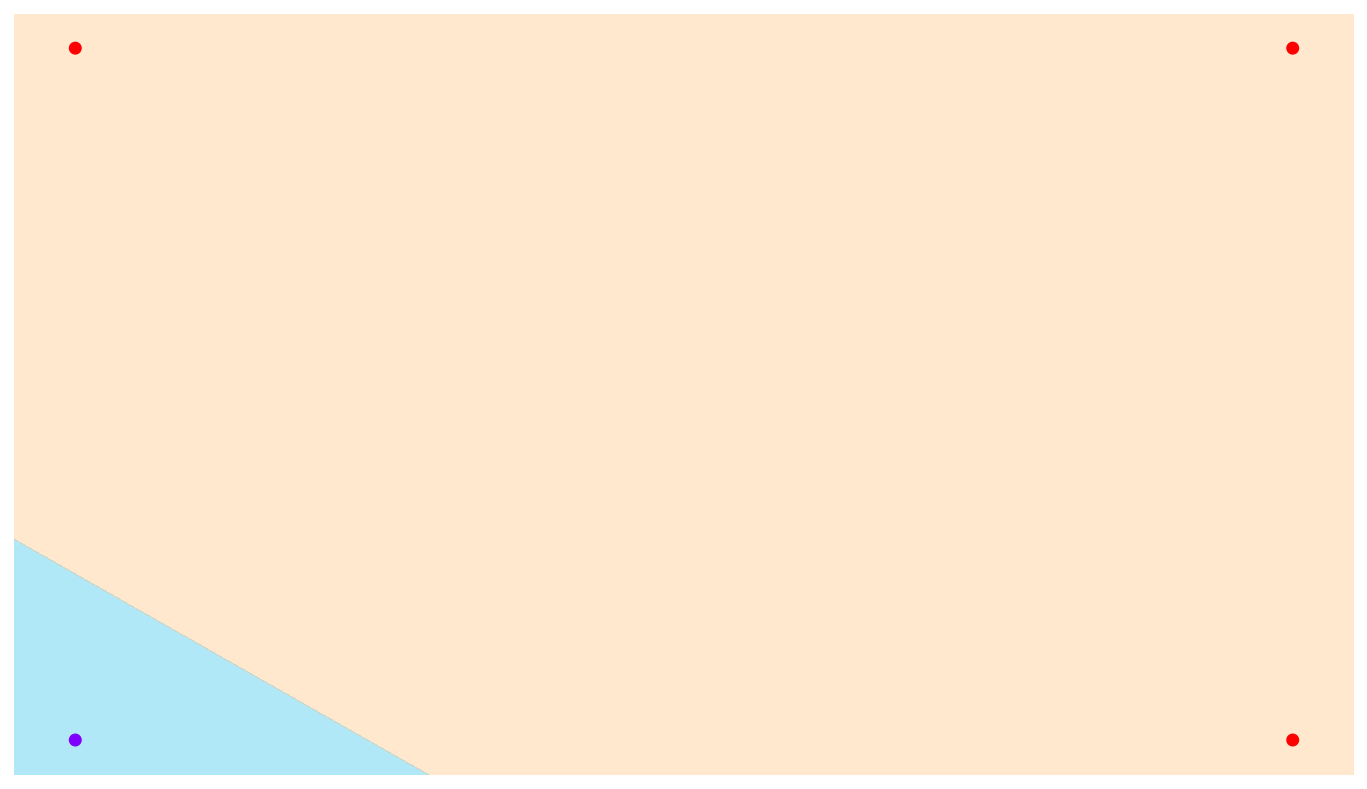

In [2]:
my_seed = 0
random.seed(my_seed)
np.random.seed(my_seed)

df = pd.DataFrame(data=[[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]], columns=['x1', 'x2', 'y'])
X = df[['x1', 'x2']]
y = df['y']
model = LogisticRegression(C=10)  # Higher C weakens the regularization to avoid underfitting here.
model.fit(X, y);
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)
print('Predictions:', model.predict([[0, 0], [0, 1], [1, 0], [1, 1]]))

# We can visualize the model by using VanderPlas' visualization code
# modified to _assume the model is already fit_:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()

    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, #clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

visualize_classifier(model, X.values, y.values, ax = plt.gca())
plt.show()

This also works for the AND function:

| x1 | x2 | y = x1 AND x2 |
| -- | -- | ------------- |
|  0 |  0 |             0 |
|  0 |  1 |             0 |
|  1 |  0 |             0 |
|  1 |  1 |             1 |

Intercept: [-3.57643092]
Coefficients: [[2.03395158 2.03395158]]
Predictions: [0 0 0 1]


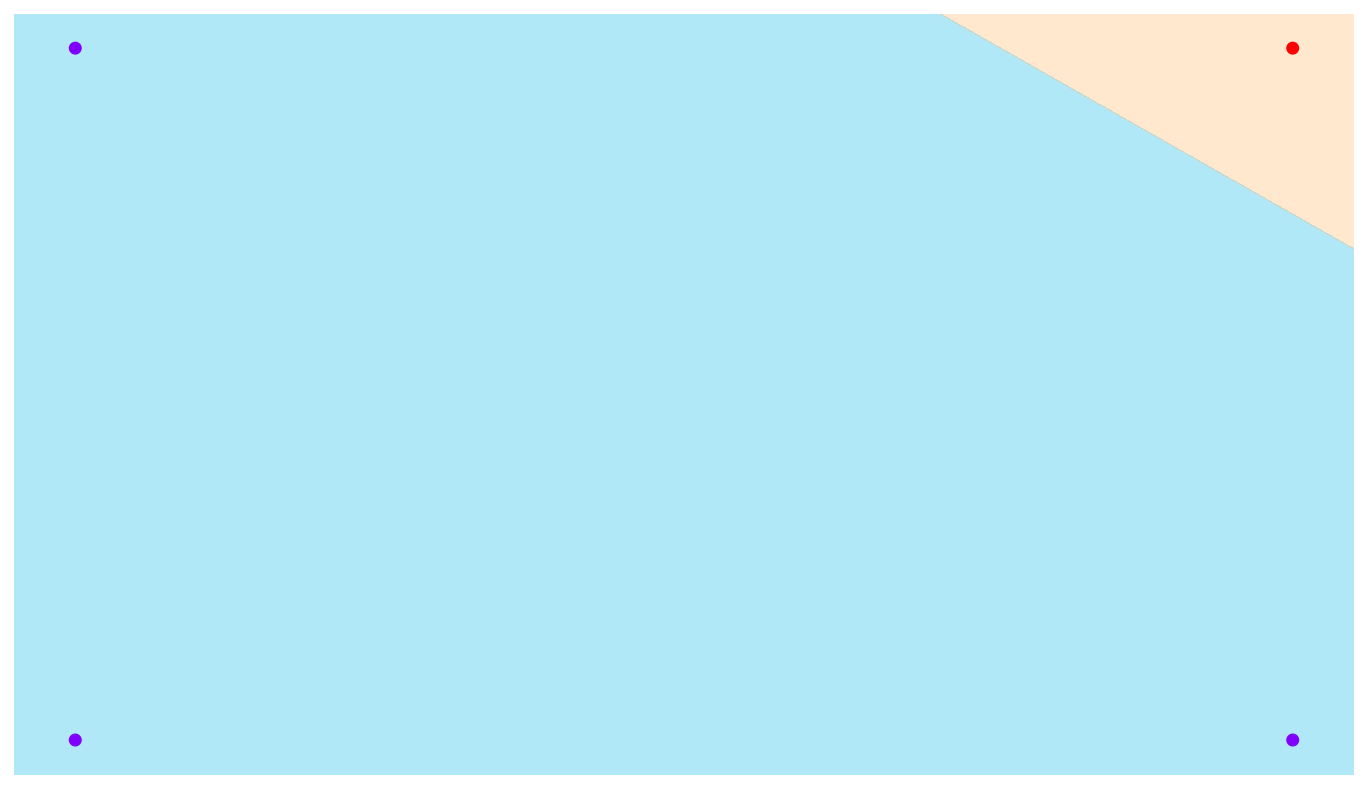

In [3]:
df = pd.DataFrame(data=[[0, 0, 0], [0, 1, 0], [1, 0, 0], [1, 1, 1]], columns=['x1', 'x2', 'y'])
X = df[['x1', 'x2']]
y = df['y']
model.fit(X, y);
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)
print('Predictions:', model.predict([[0, 0], [0, 1], [1, 0], [1, 1]]))

visualize_classifier(model, X.values, y.values, ax = plt.gca())
plt.show()


However, there is no way to learn a linear boundary to correctly classify the XOR (exclusive or) function which is true if and only if either input x1 or input x2 is true (but not both).

| x1 | x2 | y = x1 XOR x2 |
| -- | -- | ------------- |
|  0 |  0 |             0 |
|  0 |  1 |             1 |
|  1 |  0 |             1 |
|  1 |  1 |             0 |

Intercept: [0.]
Coefficients: [[0. 0.]]
Predictions: [0 0 0 0]


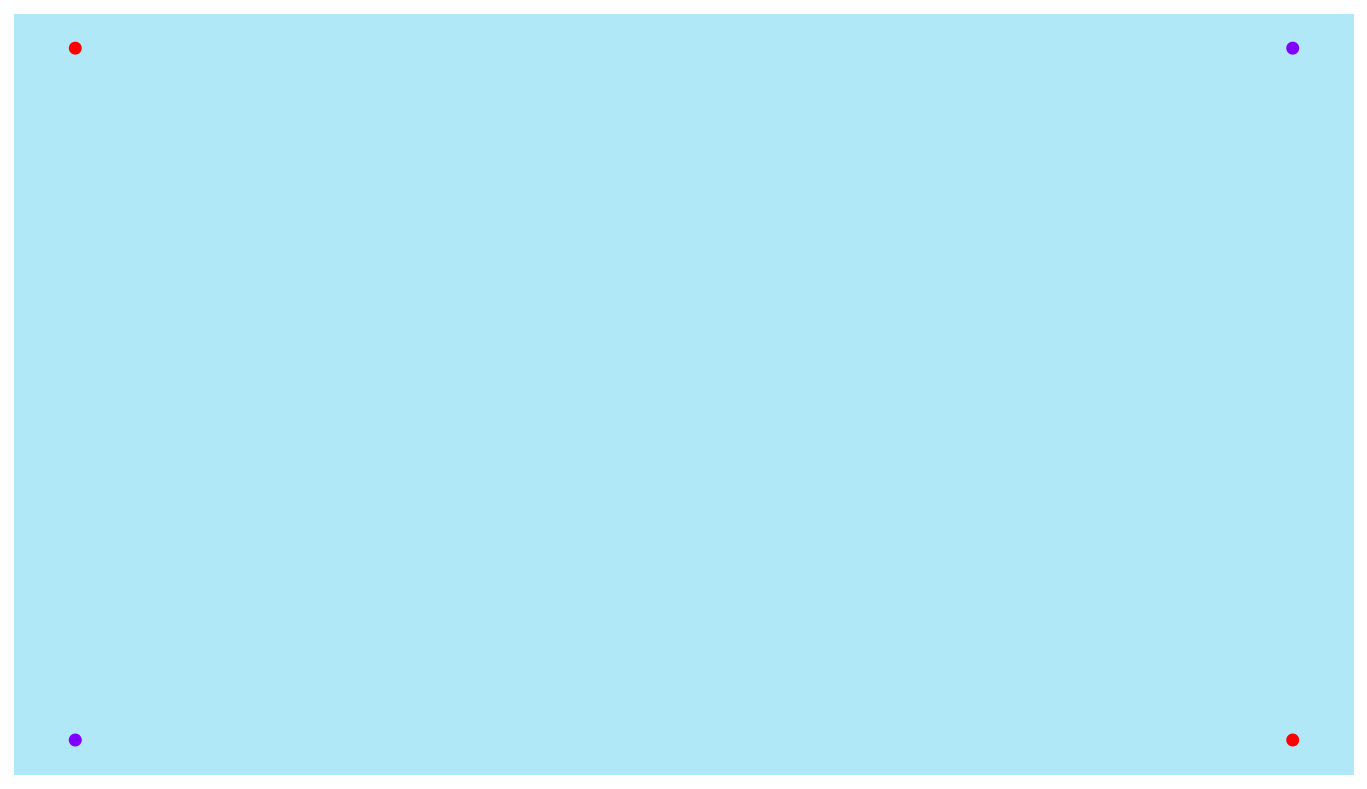

In [4]:
df = pd.DataFrame(data=[[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0]], columns=['x1', 'x2', 'y'])
X = df[['x1', 'x2']]
y = df['y']
model.fit(X, y);
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)
print('Predictions:', model.predict([[0, 0], [0, 1], [1, 0], [1, 1]]))

visualize_classifier(model, X.values, y.values, ax = plt.gca())
plt.show()

At best, logistic regression might classify 3 of 4 points correctly, but it does not have the expressive power to correctly classify such a _linearly inseparable_ function.

Since you can think of an artificial neuron as being a simple logistic regression, we can see that an artificial neuron is restricted to only learning simple linearly separable functions (e.g. AND, OR, NOT).

However, we can express XOR as a compound expression of linearly separable functions.  Consider that ```x1 XOR x2``` is equivalent to ```(x1 OR x2) AND NOT (x1 AND X2)```.  The two parenthesized expressions can each be learned by single artificial neurons.  ```NOT (x1 AND X2)``` that reverses the truth values of ```(x1 AND X2)``` can also be learned.  The full AND combination can be learned as well.

This means that a network of simple neurons can learn more complex functions by passing simple outputs as inputs to other units in what is called a _multilayer feedforward network_.  Such neural networks are a low-bias, high-variance modeling method, and have shown excellent performance for a wide variety of predictive tasks, although it is hard to say what exactly has been learned by such networks, as we cannot easily gain insight from a collection of weights and bias values.

Let us play with a simple neural network and watch something like XOR being learned using this link to the [Tensorflow Playground](https://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.1&regularizationRate=0&noise=0&networkShape=3,1&seed=0.73705&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false). (Click on the link and press the play button.)

In this demonstration, we have two classes visualized as orange and blue.  Each artificial neuron "unit" in the multilayer feedforward network has a small visualization of what each unit computes as a function of the original units.  Through each layer we can see the combinations form more complex nonlinear shapes, which leads us to an important insight:

**Each layer of a neural network engineers the input features for the next layer.**  One of the appeals to neural networks (NNs) is that they seek to learn internal representations of the input data that are helpful for producing good predictive output.  One might think one should always go to NNs as one's easy hands-free technique to model anything.  However, there are a few points to temper one's enthusiasm:

* It is often said that "A neural network is the second-best way to solve any problem."   What is generally meant is that greater insight to a problem can often suggest a simpler, better solution.  As we saw in our comparison of decision tree regression versus polynomial regression, knowing the form of the solution suggests better and often simpler approaches.  It is often best to work with the simplest model that yields acceptable results, as it is more easily explained, understood, debugged, etc.
* Neural networks can be notoriously difficult to train successfully with many architectural and learning parameter choices yielding very different results.  We see the many shining successes, but people generally don't share the many convergences failures or note the many hours spent carefully engineering the successes.  With this great versatility and power also comes great complexity and many possible ways the NN approach can fail or yield [fragile successes](https://www.nature.com/articles/d41586-019-03013-5).

Still, NNs are an important tool in one's toolset, and deep neural networks (DNNs) are gaining in popularity for many applications.  (A _deep neural network_ is simply a neural network with many layers in which to learn complex internal representations of data.)

## Neural Networks with Scikit Learn

We will first demonstrate the use of Scikit Learn's Neural Network Classifier "[MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)" in learning the XOR example from above.

Predictions: [0 1 1 0]


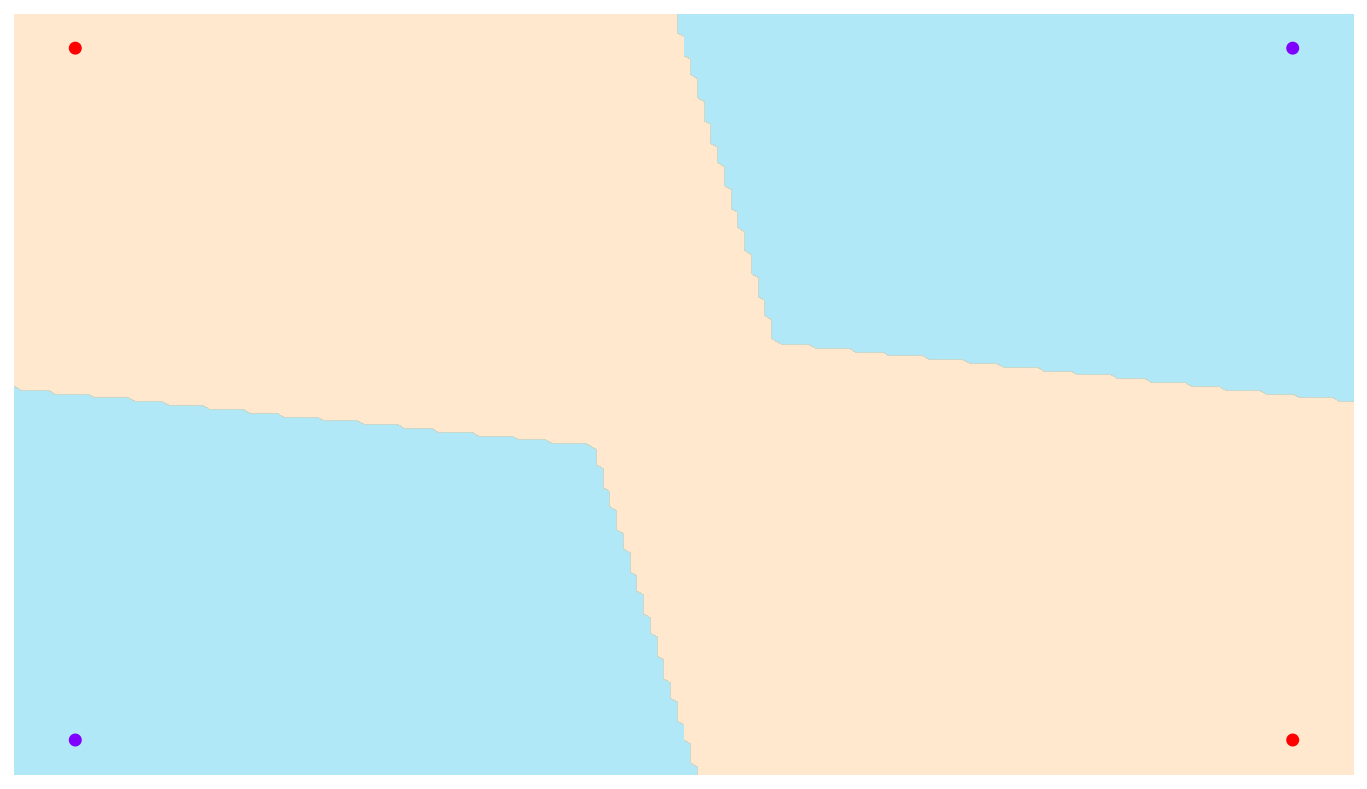

In [5]:
model = MLPClassifier(max_iter=1000, random_state=0)
model.fit(X, y);
print('Predictions:', model.predict([[0, 0], [0, 1], [1, 0], [1, 1]]))

visualize_classifier(model, X.values, y.values, ax = plt.gca())
plt.show()


That was easy enough.  Let's look at one of our earlier classification examples for k-NN classification:


Accuracy = 0.9836


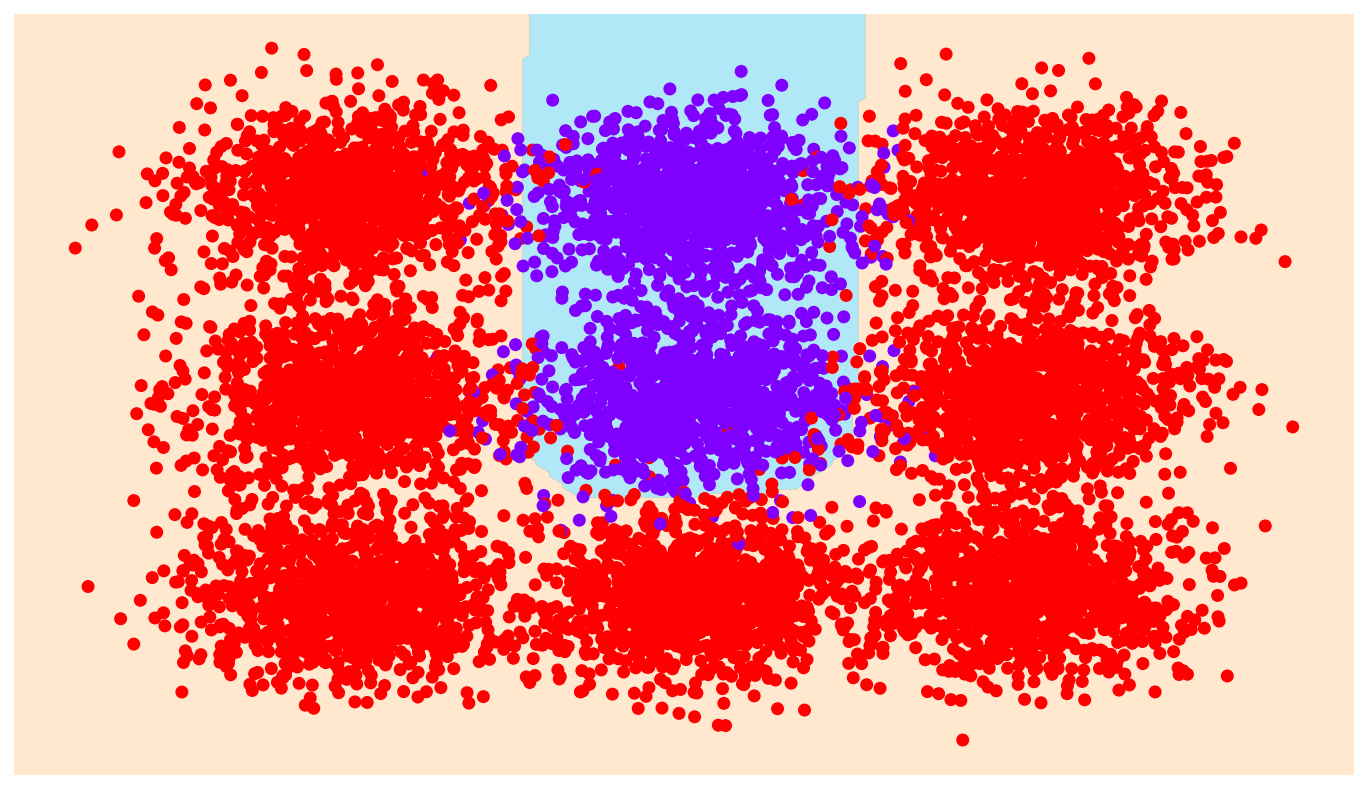

In [6]:
df = pd.read_csv('http://cs.gettysburg.edu/~tneller/ds256/data/hw10/ic10-1.csv', index_col='id')

# Create a normalization of x1, x2
input_cols = ['x1','x2']
x = df[input_cols].values  # returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled, columns=input_cols)

# Create a mapping of all unique y class/category values to 0, 1, ...
classes = df.y.unique()
class_map = {c : i for i, c in enumerate(classes)}
df_scaled['y'] = df['y'].map(class_map)

# Divide into train, test sets
X = df_scaled[['x1', 'x2']]
y = df_scaled['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=0)

model = MLPClassifier(random_state=0)
model.fit(X, y);

y_predict = model.predict(X_train)
acc = accuracy_score(y_train, y_predict)
print('Accuracy =', acc)

visualize_classifier(model, X.values, y.values, ax = plt.gca())
plt.show()

With default parameters, we achieve successful results, but the computation is costly.  Some argue that the main reason that we have seen a rise in the popularity of NNs in recent years is that we finally have machines capable of storing sufficient data and performing costly operations quickly (e.g. using Graphical Processing Units (GPUs) designed for gaming to perform highly parallelized NN computations).  Our techniques have indeed improved since the disappointing boom and bust of NN research in the 1980s, but the main difference between then and now is bigger data, bigger memory to hold it, and faster machines to learn from it.

When performing a classification for more than two classes, the common approach is to have a "softmax" output that has a separate output unit for each class, with each output indicating the probability that the input will belong to that class.  When a prediction is called upon, the output unit with the highest probability is selected for the classification prediction.  Let's see this approach applied to the "blobs" data of the decision tree lesson.

Class 0 testing accuracy:  0.928
Class 1 testing accuracy:  0.974
Class 2 testing accuracy:  0.946


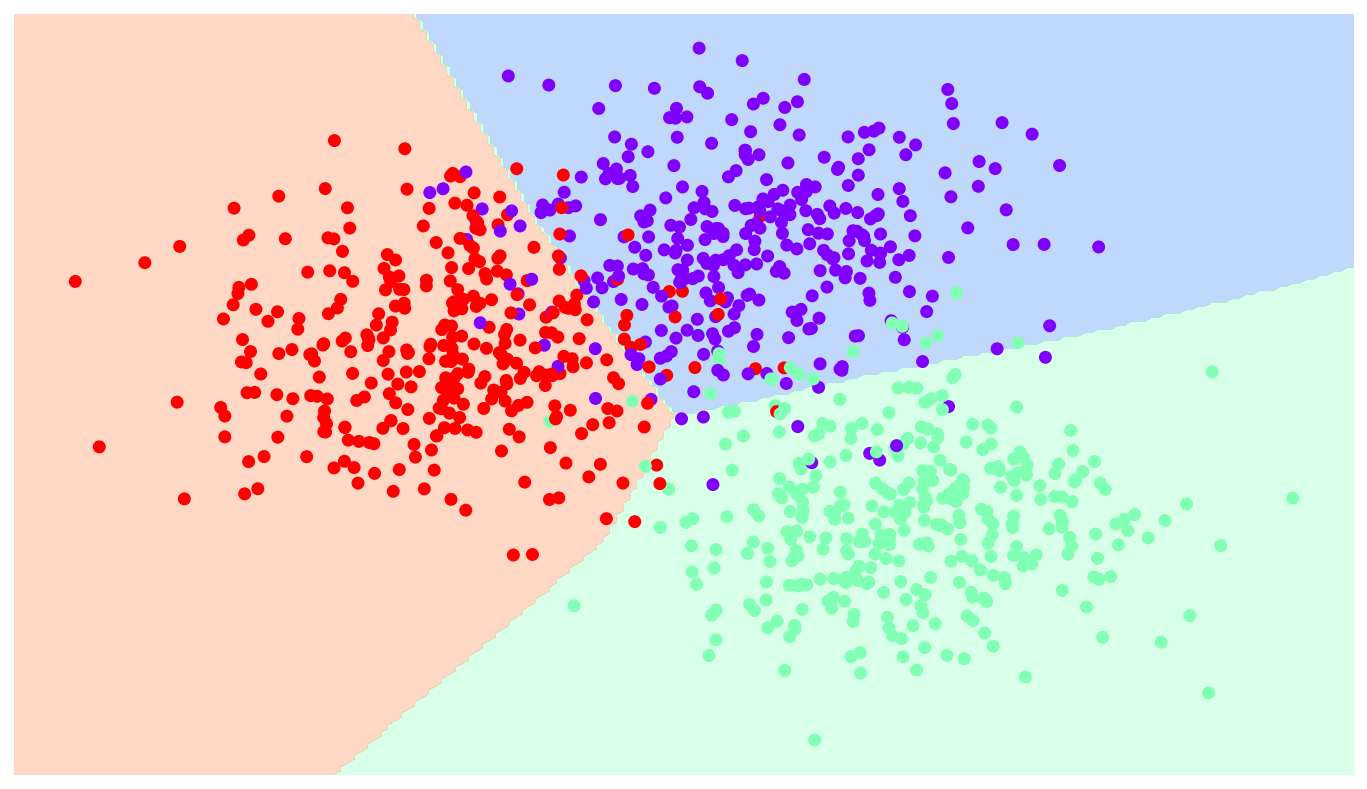

In [7]:
my_seed = 0
random.seed(my_seed)
np.random.seed(my_seed)

num_classes = 3
X, y = make_blobs(n_samples=1000, centers=num_classes,
                  random_state=my_seed, cluster_std=1.0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=my_seed, shuffle=True)

model = MLPClassifier(max_iter=1000, random_state=0)
model.fit(X_train, y_train);

y_predict = model.predict(X_test)
for c in range(num_classes):
    print('Class', c, 'testing accuracy: ', accuracy_score(y_test == c, y_predict == c))

visualize_classifier(model, X, y, ax = plt.gca())
plt.show()


This yields greater accuracy than XGBoost, which is to be expected, since the optimal boundaries are linear directly between the centers of these normally distributed blobs.  Let's see the result when we have a curvier optimal boundary.

         x1        x2  y
0  0.736644  0.394326  1
1  0.162748  0.047812  1
2  0.214820  0.606934  0
3  0.245322  0.714742  0
4  0.438145  0.498891  1


Accuracy:  0.818


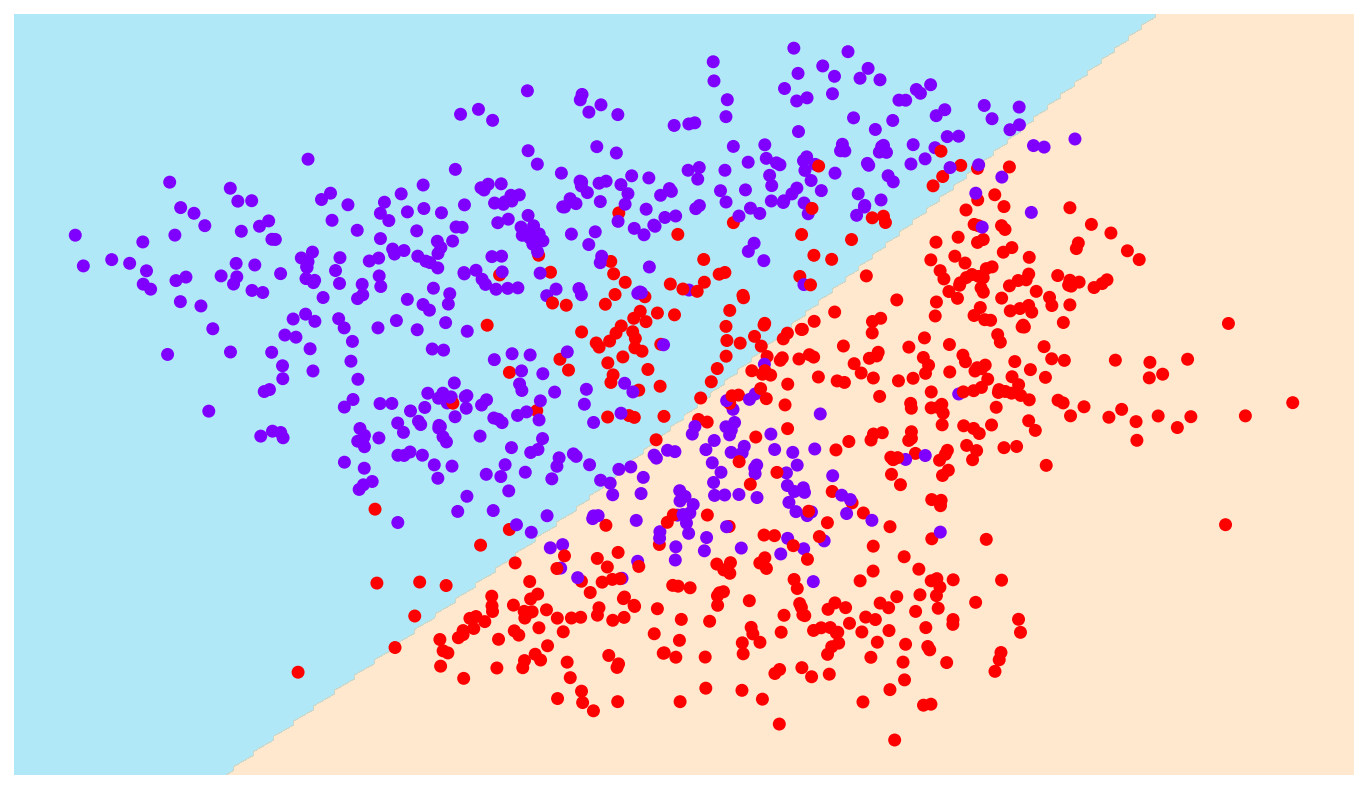

In [8]:
my_seed = 0
random.seed(my_seed)
np.random.seed(my_seed)
stdev = 0.075
num_clusters = 10
centroids = [[.5, .8], [.5, .1], [.3, .7], [.6, .6], [.1, .6], [.4, .5], [.4, .3], [.6, .4], [.2, .4], [.3, .1]]
data = [[np.random.normal(loc=centroids[i % num_clusters][0], scale=stdev),
         np.random.normal(loc=centroids[i % num_clusters][1], scale=stdev),
         (i % num_clusters) % 2] for i in range(1000)]
random.shuffle(data, random.random)
x1 = [x[0] for x in data if x[2] == '0']
x2 = [x[1] for x in data if x[2] == '0']
plt.scatter(x1, x2, color='orange')
x1 = [x[0] for x in data if x[2] == '1']
x2 = [x[1] for x in data if x[2] == '1']
df = pd.DataFrame(data, columns=['x1', 'x2', 'y'])
print(df.head())
X = df[['x1', 'x2']]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=my_seed, shuffle=True)

model = MLPClassifier(max_iter=1000, random_state=0)
model.fit(X_train, y_train);

y_predict = model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_predict))

visualize_classifier(model, X.values, y.values, ax = plt.gca())
plt.show()

In constrast, this is not a good classifier.  How do we get a better fit to the data? By default, we are training with 100 units in a single "hidden layer" of the network feeding into the single output unit.  We could add more layers, more units, etc., but sometimes the problem is that we're underfitting because of the default "regularization" that seeks to simplify the model, penalizing a more sophisticated model.  The parameter ```alpha``` (default=0.0001) can be used to adjust the regularization:

Accuracy:  0.88


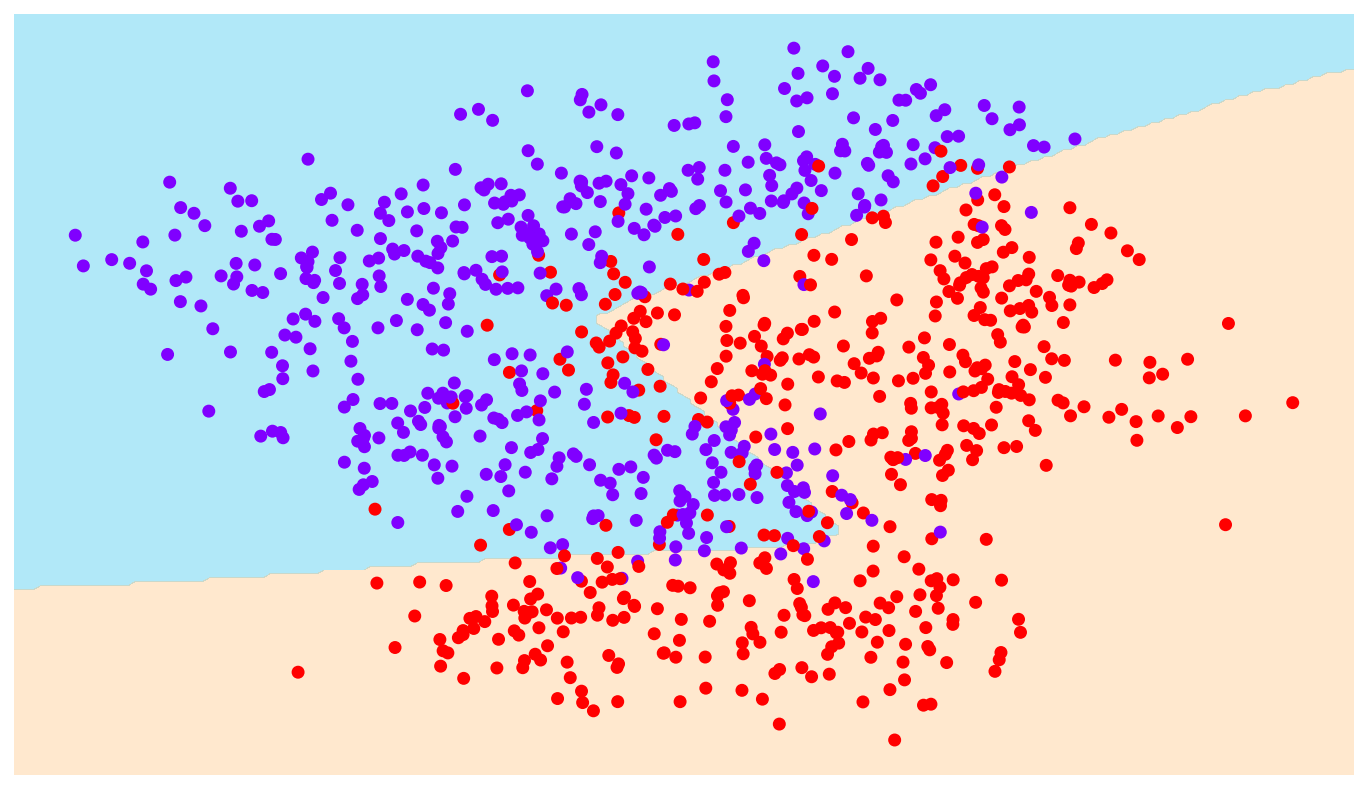

In [9]:
model = MLPClassifier(alpha=.00005, max_iter=10000, random_state=1)
model.fit(X_train, y_train);

y_predict = model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_predict))

visualize_classifier(model, X.values, y.values, ax = plt.gca())
plt.show()

You may note that my ```random_state``` parameter is not 0.  The result was poor for seed 0 and better (but not great) for seed 1.   Outcomes for NN learning can be highly variable, as training is a stochastic (random) search in a very high dimensional space of weights and bias parameters.  There are many local error minima, and it can be easy to have a network that _could_ express a function well, not achieve a good fit.

Let's see what happens when we leave parameters as defaults and increase the _depth_ of the network to include 2 layers of 50 units instead of one layer of 100 units.

Accuracy:  0.896


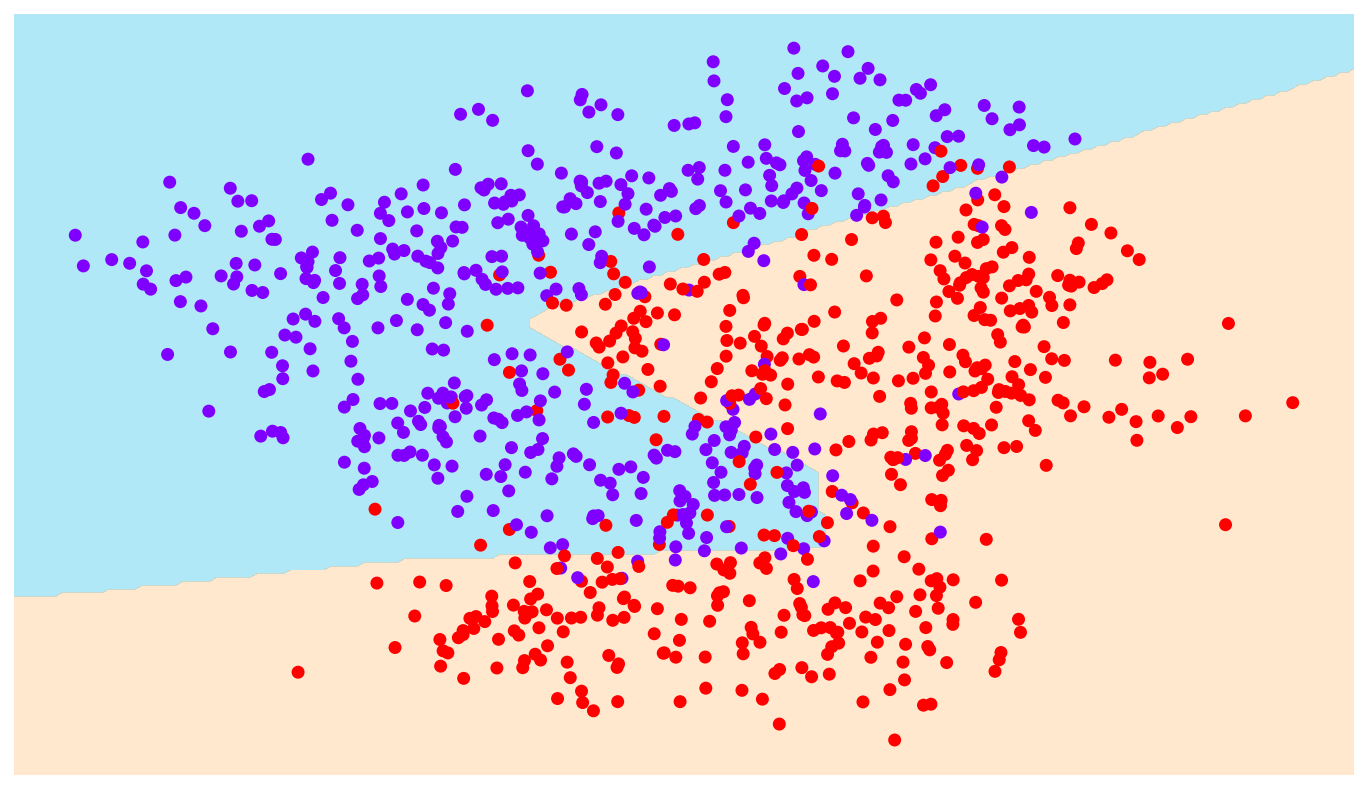

In [10]:
model = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=0)
model.fit(X_train, y_train);

y_predict = model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_predict))

visualize_classifier(model, X.values, y.values, ax = plt.gca())
plt.show()

This is not as good as the .904 accuracy we achieved by optimizing $k$ for $k$-NN, but is a decent result on the first try.

## Regression

Neural Networks may also be applied to regression as well.  Let us observe the result of applying the [MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) to our degree 4 polynomial regression dataset.


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean squared error (MSE): 389614.0723835577


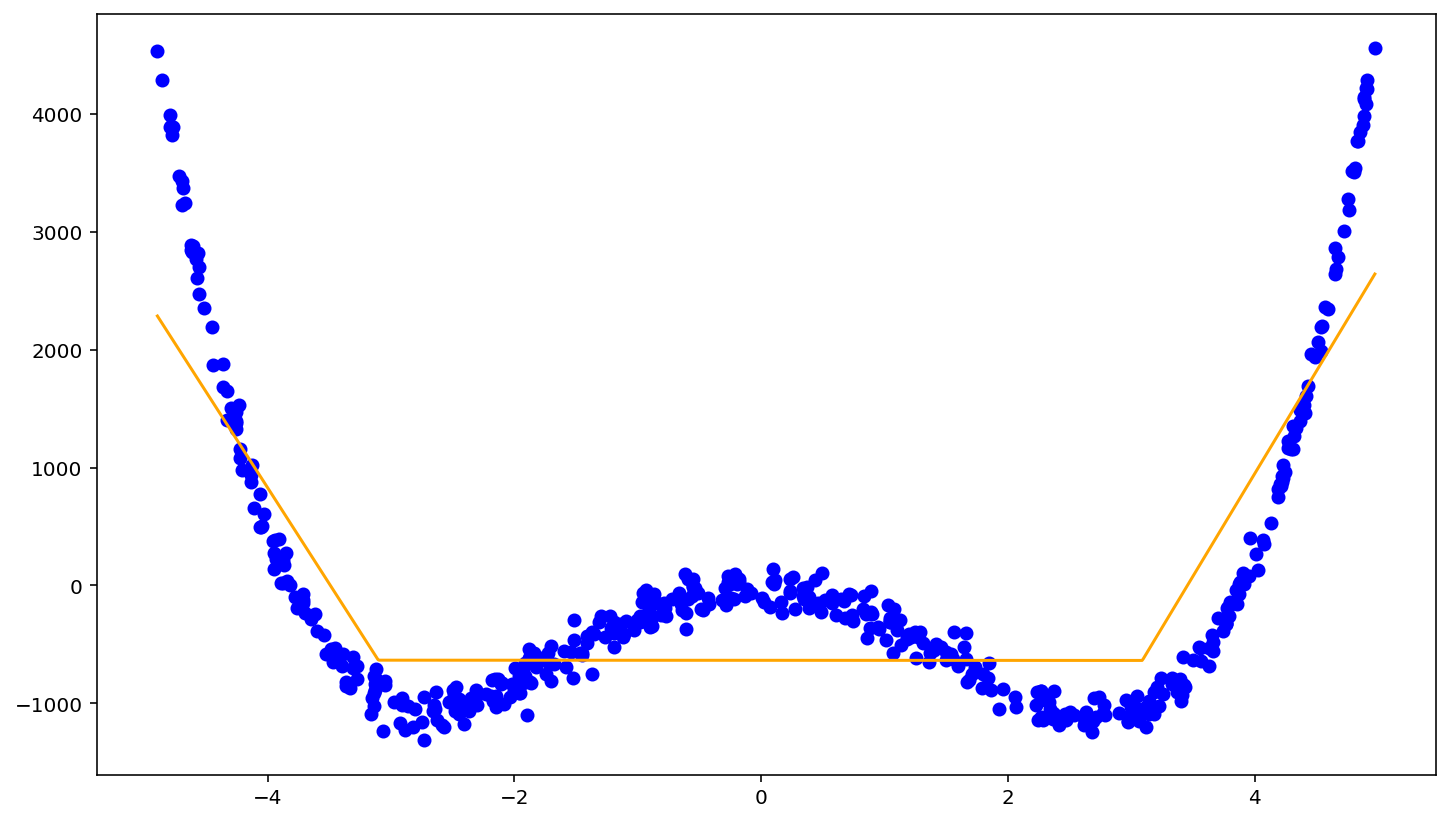

In [11]:
df = pd.read_csv('http://cs.gettysburg.edu/~tneller/ds256/data/hw6/hw6-1.csv', index_col='id')

X = df[['x']]  # select input(s)
y = df['y']  # select output

# As before, we will split our datasets into training and testing datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=my_seed, shuffle=True)

model = MLPRegressor(max_iter=10000, random_state=0)
model.fit(X_train, y_train);

print('Mean squared error (MSE):', mean_squared_error(y_test, model.predict(X_test)))

Xfit = pd.DataFrame()
Xfit['x'] = np.linspace(start=X['x'].min(), stop=X['x'].max(), num=1000)  # 1000 linearly spaces points from the min to the max of x
yfit = model.predict(Xfit)  # predict y's from the linearly spaced x data
plt.scatter(X['x'], y, color='blue')  # scatter plot of original data
plt.plot(Xfit['x'], yfit, color='orange');  # line plot showing fit of learned quartic function
plt.show()


After 10000 iterations, the single 100-unit layer NN hasn't converged.  Observe the difference with two 50-unit layers.

Mean squared error (MSE): 17909.875476572794


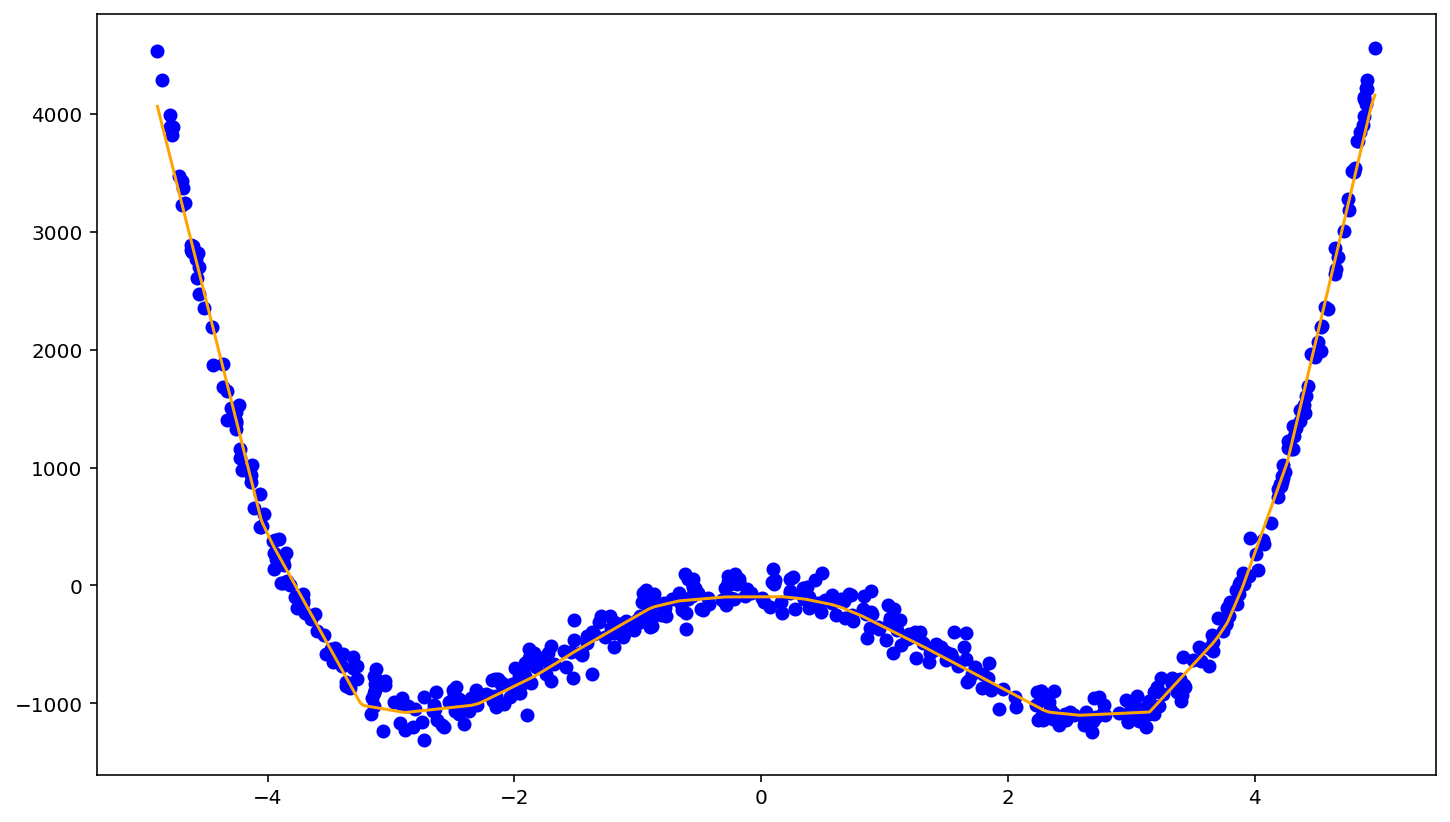

In [12]:
model = MLPRegressor(hidden_layer_sizes=(50, 50,), max_iter=10000, random_state=0)
model.fit(X_train, y_train);

print('Mean squared error (MSE):', mean_squared_error(y_test, model.predict(X_test)))

Xfit = pd.DataFrame()
Xfit['x'] = np.linspace(start=X['x'].min(), stop=X['x'].max(), num=1000)  # 1000 linearly spaces points from the min to the max of x
yfit = model.predict(Xfit)  # predict y's from the linearly spaced x data
plt.scatter(X['x'], y, color='blue')  # scatter plot of original data
plt.plot(Xfit['x'], yfit, color='orange');  # line plot showing fit of learned quartic function
plt.show()


This is much-improved over all decision tree approaches.  Let's see what happens when we make 4 layers of 25 units each.

Mean squared error (MSE): 14091.60149022795


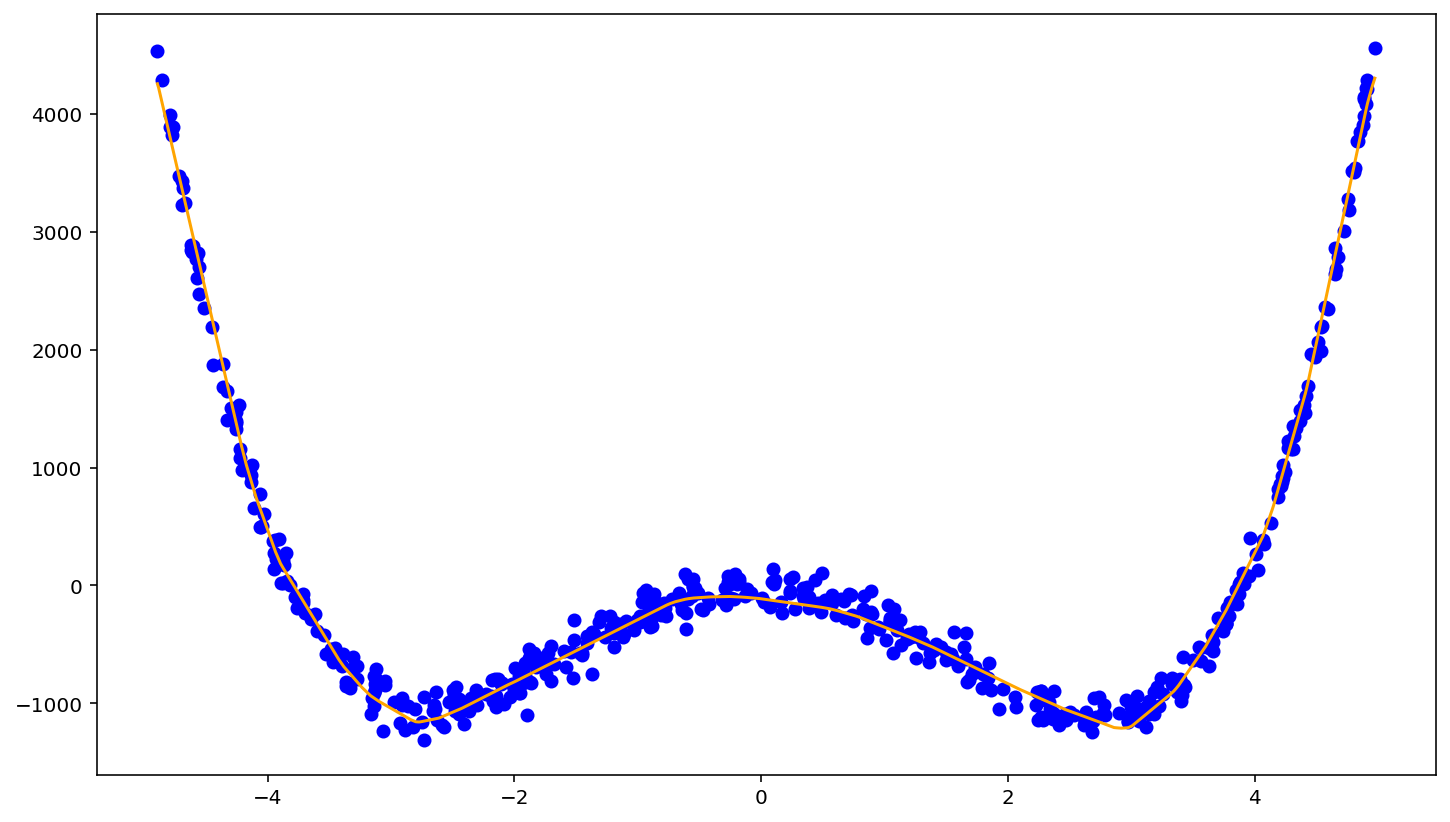

In [13]:
model = MLPRegressor(hidden_layer_sizes=(25, 25, 25, 25,), max_iter=10000, random_state=0)
model.fit(X_train, y_train);

print('Mean squared error (MSE):', mean_squared_error(y_test, model.predict(X_test)))

Xfit = pd.DataFrame()
Xfit['x'] = np.linspace(start=X['x'].min(), stop=X['x'].max(), num=1000)  # 1000 linearly spaces points from the min to the max of x
yfit = model.predict(Xfit)  # predict y's from the linearly spaced x data
plt.scatter(X['x'], y, color='blue')  # scatter plot of original data
plt.plot(Xfit['x'], yfit, color='orange');  # line plot showing fit of learned quartic function
plt.show()

This is better still, and we're getting closer to the 10775 MSE of the knowing-the-model approach of fitting a degree 4 polynomial to the noisy data.  We can see that every design choice, from maximum number of iterations, to the size and depth of the NN architecture can have a significant impact, and this is just scratching the surface of the [many parameters we could tune for regression](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) or [classification](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier).

Neural network learning is often allocated its very own course in order to allow for understanding of the many different dimensions of the NN design space.  For now, it suffices for you to get an experiential taste of this family of models, and gain an understanding of the pros and cons.  Generally speaking, we want to use the simplest, most interpretable model that meets our performance criteria.

One final note: Neural network libraries have risen and fallen in popularity.  [Tensorflow](https://www.tensorflow.org/) and [PyTorch](https://pytorch.org/) have been trading places for most popular in recent years, and we can expect fashions to change in the future as well.  There are even algorithms that seek to automate NN experimentation and network architecture design (e.g. [AutoML and Neural Architecture Search](https://towardsdatascience.com/everything-you-need-to-know-about-automl-and-neural-architecture-search-8db1863682bf)) that take common design process templates and seek to automate the tuning of practitioners.  In all tools, there will be tradeoffs of simplicity of use versus freedom of design and fine-grained control of learning.

It will be well worth your time to gain greater experience with more popular tools.  For example, look at these examples of [PyTorch regression](https://medium.com/@benjamin.phillips22/simple-regression-with-neural-networks-in-pytorch-313f06910379).



# In Class

## Classification

Create your best ```MPLClassifier``` for the HW12 In Class exercise classification data, compare your results to those of the methods of the HW12 In Class exercises, and comment on your findings.  Experiment as above with different numbers of layers and units per layer.

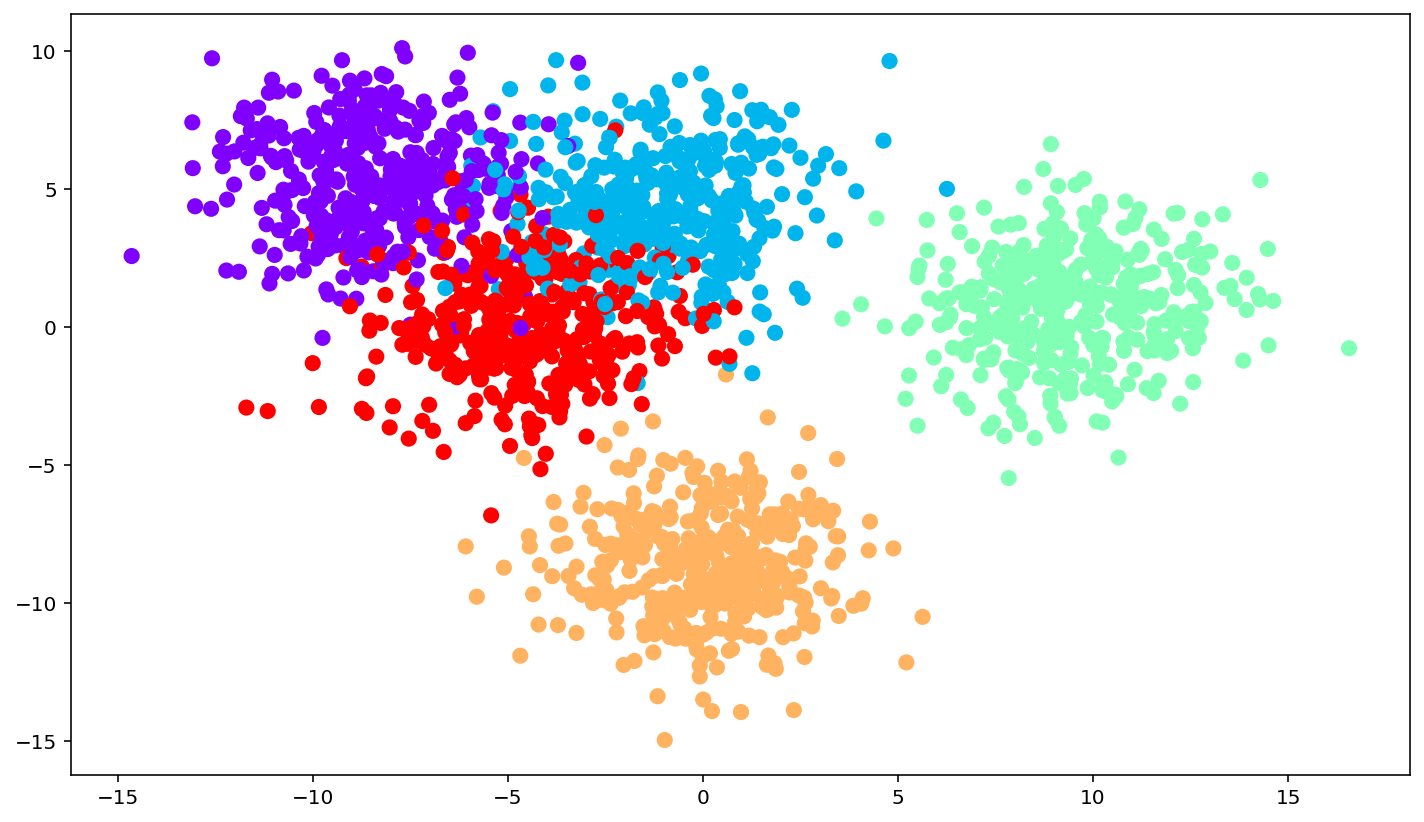

In [14]:
my_seed = 7
random.seed(my_seed)
np.random.seed(my_seed)
num_classes = 5

# We generate 2000 clustered 2D data points sampled from 5 normally-distributed clusters
#   with each cluster representing a different class.
X, y = make_blobs(n_samples=2000, centers=num_classes,
                  random_state=my_seed, cluster_std=2.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');



(Insert your comparison and comments here.)

## Regression

Create your best MPLRegressor for the HW12 In Class exercise regression data, compare your results to those of the methods of the HW12 In Class exercises, and comment on your findings. Experiment as above with different numbers of layers and units per layer.  What do you observe about NN regressions with discontinuous functions?

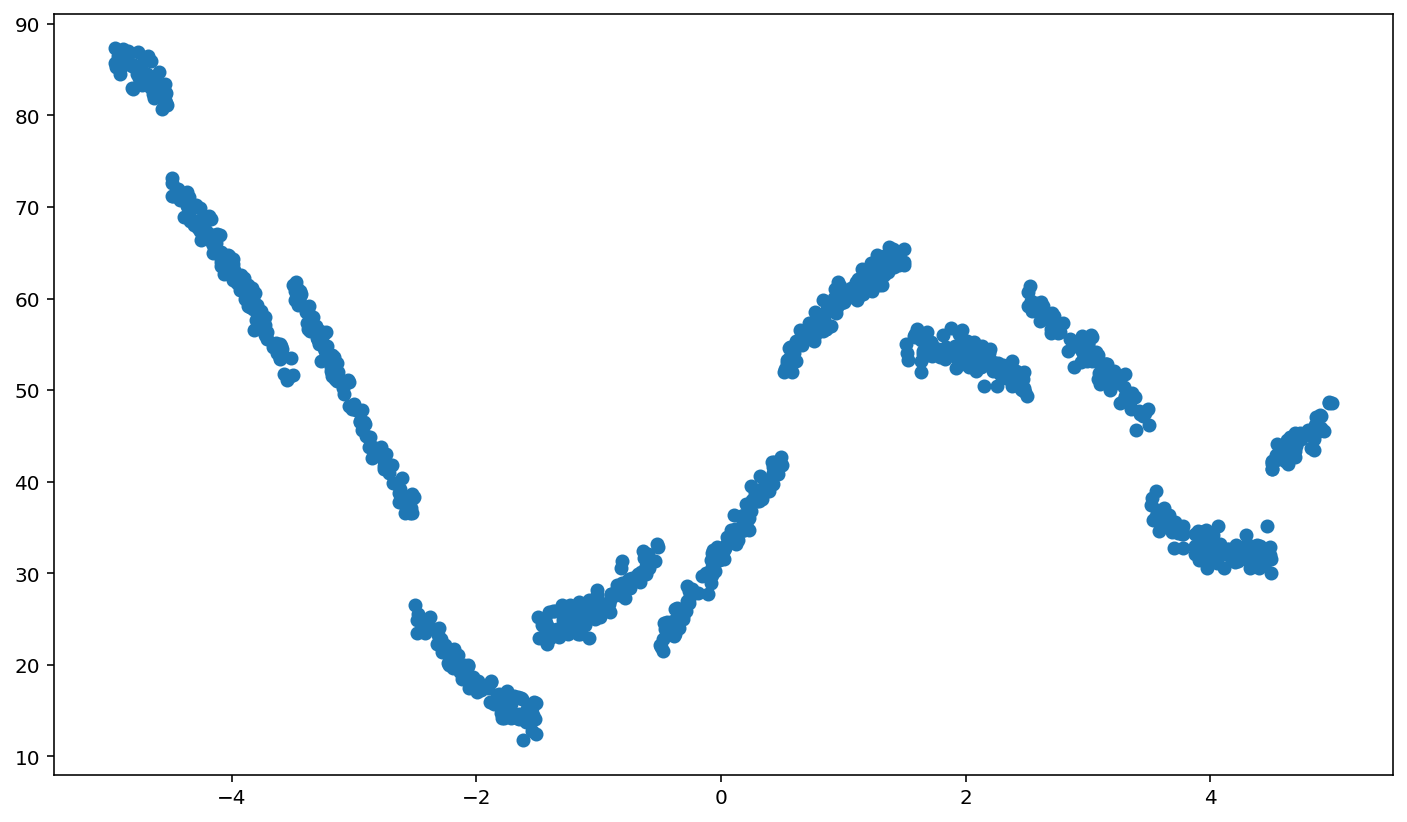

In [15]:
random.seed(42)
np.random.seed(42)
x_names = ['x']
df = pd.DataFrame(np.random.uniform(low=-5, high=5, size=(1000, 1)), columns=x_names)
df['y'] = df['x'].map(lambda x: 42 + 20 * math.sin(x) + x * x + (-10 if round(x) % 2 == 0 else 0) + np.random.normal(scale=1))
plt.scatter(df['x'], df['y'])  # scatter plot of original data




(Insert your comparison and comments here.)

## Homework


**Exercise 1:** Complete the in-class exercises if you haven't already.

**Exercise 2:** Model and classify the data of [hw12-1.csv](http://cs.gettysburg.edu/~tneller/ds256/data/hw12/hw12-1.csv) with all of the same steps and NN classifier of your in-class classification work.  _However_, you must first preprocess and normalize your data.  **Compare to HW12 solution performance and comment on the MPLClassifier's relative performance.**

Tip: If you have problems with an error "TypeError: '(slice(None, None, None), 0)' is an invalid key", use the following when you split your data:

```X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, train_size=0.5, random_state=my_seed, shuffle=True)```

More on this in chapters on ```numpy``` and ```pandas```.


(Insert your comparison and comments here.)

**Exercise 3:** Model and regress the data of [hw12-2.csv](http://cs.gettysburg.edu/~tneller/ds256/data/hw12/hw12-2.csv) using a neural network with all of the steps and models of your in-class regression work. Experiment with different NN architectures, parameter settings, etc. and share your best performance within reasonable computational time limits. **Compare to HW12 solution performance and comment on the MPLRegressor's relative performance.**

(Insert your comparison and comments here.)

(end of homework)